<a href="https://colab.research.google.com/github/hetpatel007/Het_Special_Topics/blob/main/Copy_of_Independent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


What are the key socio-economic, healthcare, environmental, and psychological factors influencing life expectancy and happiness across South American countries, and how do these factors differ between high and low-performing countries in the region?

In [ ]:
# Replace 'your_file.dta' with the path to your Stata file
file_path =  'https://drive.google.com/uc?export=download&id=1Qnx5xrpgey8G6XW3_s2trMMStMmWCVek'

data_1 = pd.read_csv(file_path)

In [ ]:
data_1.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
# Select the relevant columns and rename 'Life Ladder' to 'Happiness'
Happiness = data_1[['Country name', 'year', 'Life Ladder', 'Perceptions of corruption','Social support']].copy()

# Rename columns
Happiness.rename(columns={'Life Ladder': 'Happiness', 'Perceptions of corruption': 'Perception of Corruption'}, inplace=True)

# Display the first 5 rows of the modified dataset
print(Happiness.head())

  Country name  year  Happiness  Perception of Corruption  Social support
0  Afghanistan  2008      3.724                     0.882           0.451
1  Afghanistan  2009      4.402                     0.850           0.552
2  Afghanistan  2010      4.758                     0.707           0.539
3  Afghanistan  2011      3.832                     0.731           0.521
4  Afghanistan  2012      3.783                     0.776           0.521


#Filter data for south american countries

In [ ]:
# List of South American countries
south_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
]

# Filter the dataset to include only South American countries
Happiness_South_America = Happiness[Happiness['Country name'].isin(south_american_countries)]

# Display the first few rows of the filtered dataset
print(Happiness_South_America.head())


   Country name  year  Happiness  Perception of Corruption  Social support
37    Argentina  2006      6.313                     0.852           0.938
38    Argentina  2007      6.073                     0.881           0.862
39    Argentina  2008      5.961                     0.865           0.892
40    Argentina  2009      6.424                     0.885           0.919
41    Argentina  2010      6.441                     0.855           0.927


Descriptive stats

In [ ]:
# Generate descriptive statistics for the filtered dataset
descriptive_stats = Happiness_South_America.describe()

# Print the descriptive statistics
print(descriptive_stats)

              year   Happiness  Perception of Corruption  Social support
count   149.000000  149.000000                149.000000      149.000000
mean   2012.805369    6.055221                  0.785369        0.868591
std       4.311640    0.555693                  0.095972        0.048694
min    2005.000000    4.041000                  0.471000        0.756000
25%    2009.000000    5.713000                  0.741000        0.829000
50%    2013.000000    6.062000                  0.812000        0.883000
75%    2016.000000    6.449000                  0.855000        0.906000
max    2020.000000    7.478000                  0.931000        0.959000


Happiness over the years

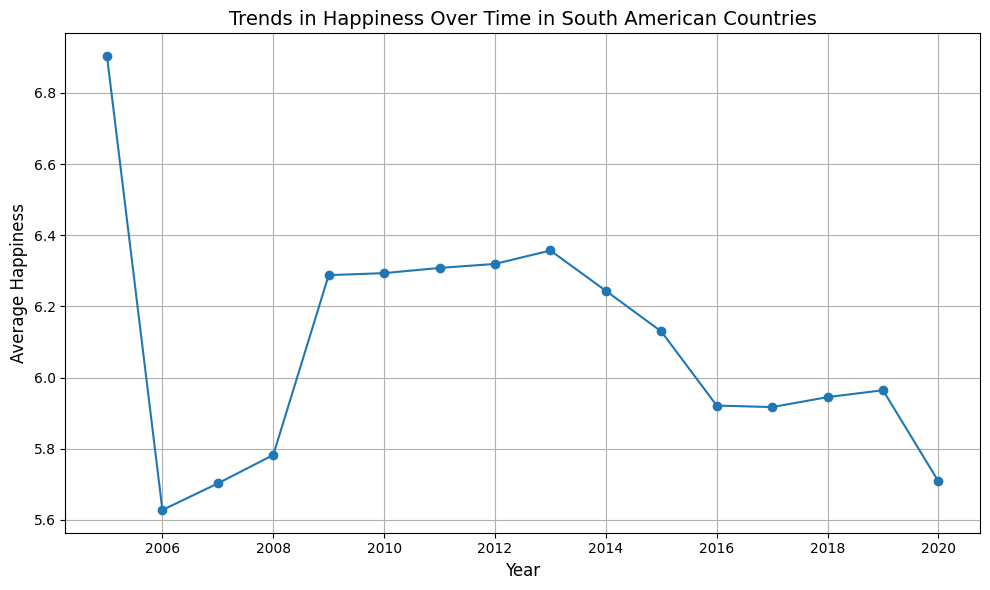

In [ ]:
import matplotlib.pyplot as plt

# Grouping the data by year and calculating the mean happiness score for each year
happiness_trends = Happiness_South_America.groupby('year')['Happiness'].mean()

# Plotting the trends in happiness over time
plt.figure(figsize=(10, 6))
plt.plot(happiness_trends.index, happiness_trends.values, marker='o')

# Adding titles and labels
plt.title('Trends in Happiness Over Time in South American Countries', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Happiness', fontsize=12)

# Display grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Filter the data for the year 2006
data_2006 = Happiness_South_America[Happiness_South_America['year'] == 2006]

# Display the data for 2006
print(data_2006)

# Calculate the mean happiness score for 2006
mean_happiness_2006 = data_2006['Happiness'].mean()
print(f"Mean Happiness in 2006: {mean_happiness_2006}")



     Country name  year  Happiness  Perception of Corruption  Social support
37      Argentina  2006      6.313                     0.852           0.938
178       Bolivia  2006      5.374                     0.794           0.834
327         Chile  2006      6.063                     0.634           0.836
357      Colombia  2006      6.025                     0.808           0.910
483       Ecuador  2006      5.024                     0.901           0.910
1353     Paraguay  2006      4.730                     0.841           0.895
1366         Peru  2006      4.811                     0.895           0.875
1851      Uruguay  2006      5.786                     0.477           0.912
1880    Venezuela  2006      6.525                     0.646           0.946
Mean Happiness in 2006: 5.627888888888888


In [ ]:
# Filter the dataset for the year 2006
data_2006 = Happiness_South_America[Happiness_South_America['year'] == 2006]

# Find the country with the lowest happiness score in 2006
lowest_happiness_2006 = data_2006.loc[data_2006['Happiness'].idxmin()]

# Display the country with the lowest happiness score
print(f"Country with the lowest happiness score in 2006: {lowest_happiness_2006['Country name']}")
print(f"Happiness score: {lowest_happiness_2006['Happiness']}")


Country with the lowest happiness score in 2006: Paraguay
Happiness score: 4.73


In [ ]:
import plotly.express as px

# Grouping the data by country and calculating the mean happiness for each country
happiness_by_country = Happiness_South_America.groupby('Country name')['Happiness'].mean().sort_values()

# Creating an interactive bar chart
fig = px.bar(happiness_by_country,
             x=happiness_by_country.index,
             y='Happiness',
             title='Average Happiness by Country in South America',
             labels={'Happiness': 'Average Happiness', 'index': 'Country'},
             text_auto=True)

# Updating layout for better readability
fig.update_layout(xaxis_title="Country", yaxis_title="Average Happiness",
                  xaxis_tickangle=-45, height=600, width=1000)

# Show the interactive plot
fig.show()


Cooruption over the years

Descriptive Statistics for Perception of Corruption:
count    149.000000
mean       0.785369
std        0.095972
min        0.471000
25%        0.741000
50%        0.812000
75%        0.855000
max        0.931000
Name: Perception of Corruption, dtype: float64


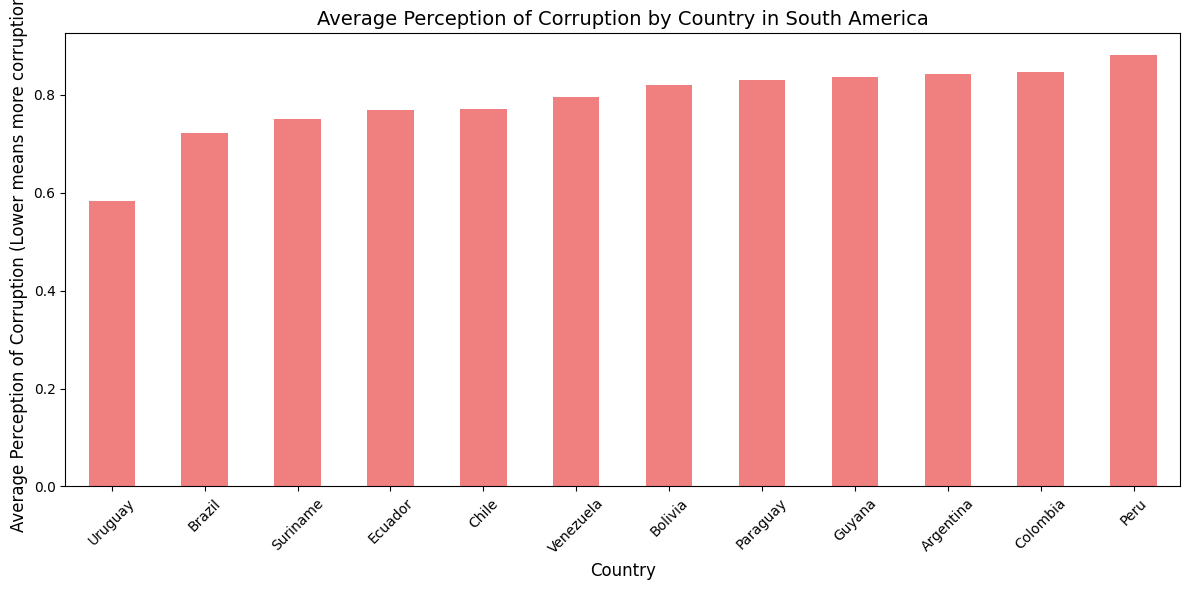

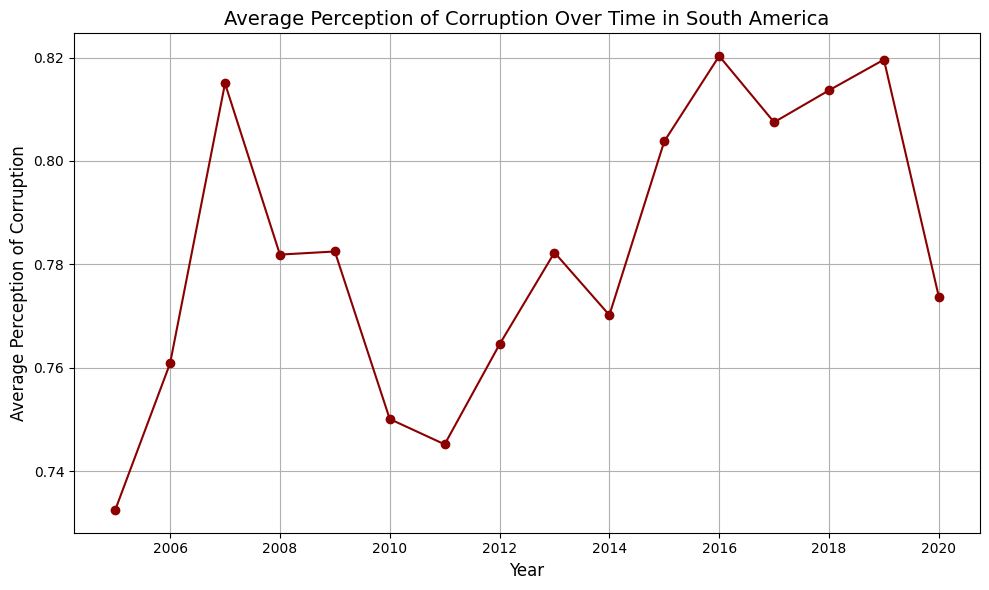

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Summary Statistics for Corruption
corruption_stats = Happiness_South_America['Perception of Corruption'].describe()
print("Descriptive Statistics for Perception of Corruption:")
print(corruption_stats)

# Step 2: Visualization of Corruption by Country
plt.figure(figsize=(12, 6))
corruption_by_country = Happiness_South_America.groupby('Country name')['Perception of Corruption'].mean().sort_values()
corruption_by_country.plot(kind='bar', color='lightcoral')

# Adding titles and labels
plt.title('Average Perception of Corruption by Country in South America', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Perception of Corruption (Lower means more corruption)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 3: Corruption Over Time
plt.figure(figsize=(10, 6))
corruption_over_time = Happiness_South_America.groupby('year')['Perception of Corruption'].mean()

# Plotting corruption over time
plt.plot(corruption_over_time.index, corruption_over_time.values, marker='o', color='darkred')
plt.title('Average Perception of Corruption Over Time in South America', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Perception of Corruption', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#Social support relation with happinness


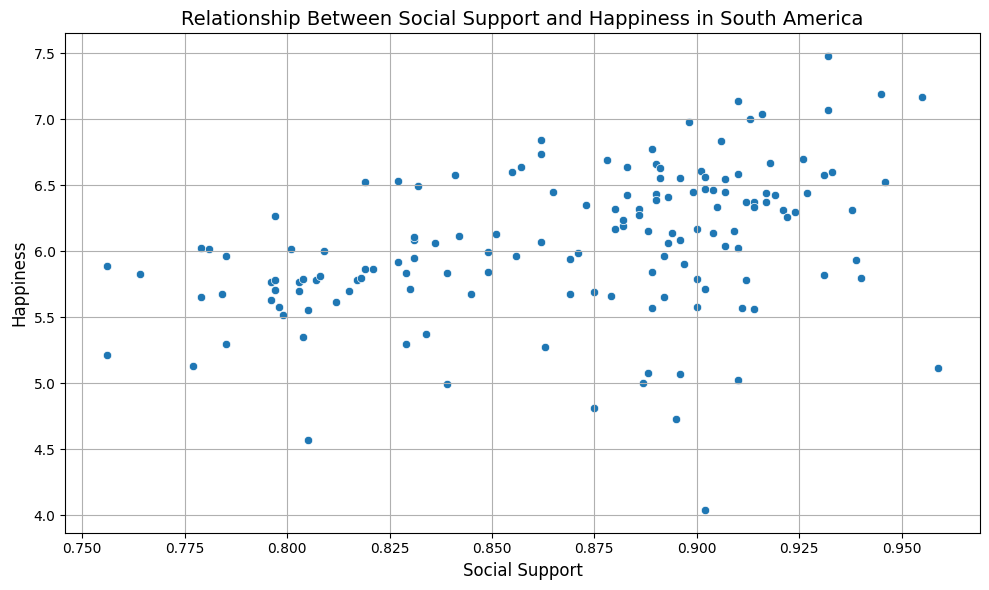

Correlation between Social Support and Happiness: 0.39881870311622225


In [ ]:
# Assuming the dataset contains a 'Social support' column
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Scatter Plot to visualize the relationship between Social Support and Happiness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social support', y='Happiness', data=Happiness_South_America)

# Adding titles and labels
plt.title('Relationship Between Social Support and Happiness in South America', fontsize=14)
plt.xlabel('Social Support', fontsize=12)
plt.ylabel('Happiness', fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Correlation Calculation
# Calculating the correlation between Social Support and Happiness
correlation_social_support = Happiness_South_America['Social support'].corr(Happiness_South_America['Happiness'])
print(f"Correlation between Social Support and Happiness: {correlation_social_support}")


#Country wise correlation between social support and Happiness

In [ ]:
valid_data = Happiness_South_America.groupby('Country name').filter(lambda x: len(x) > 1 and x['Social support'].std() > 0 and x['Happiness'].std() > 0)

# Calculating the correlation between Social Support and Happiness for each country
correlation_by_country = valid_data.groupby('Country name').apply(
    lambda x: x['Social support'].corr(x['Happiness'])
)

# Displaying the correlation values by country
print(correlation_by_country)




Country name
Argentina    0.353619
Bolivia      0.236771
Brazil       0.588097
Chile        0.300395
Colombia     0.678404
Ecuador     -0.382555
Paraguay     0.120343
Peru        -0.251293
Uruguay      0.330055
Venezuela    0.730268
dtype: float64


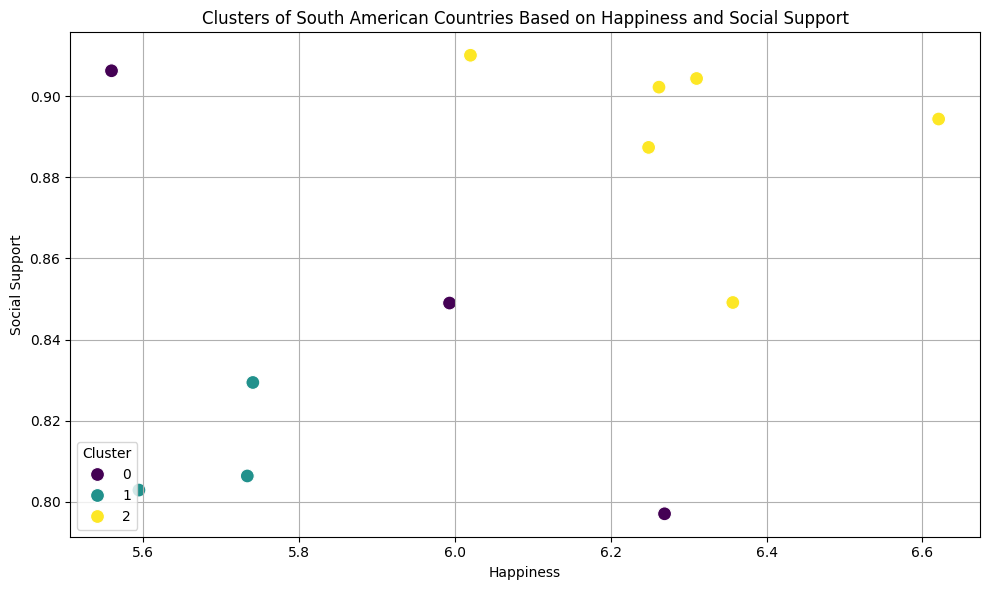


Cluster 2:
['Argentina', 'Brazil', 'Chile', 'Colombia', 'Uruguay', 'Venezuela']

Cluster 1:
['Bolivia', 'Ecuador', 'Peru']

Cluster 0:
['Guyana', 'Paraguay', 'Suriname']


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for clustering (average happiness and social support per country)
clustering_data = Happiness_South_America.groupby('Country name')[['Happiness', 'Social support']].mean()

# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Perform K-Means clustering (try 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Step 2: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Happiness', y='Social support', hue='Cluster', data=clustering_data, palette='viridis', s=100)
plt.title('Clusters of South American Countries Based on Happiness and Social Support')
plt.xlabel('Happiness')
plt.ylabel('Social Support')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Inferences - Print out the countries in each cluster
for cluster in clustering_data['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(clustering_data[clustering_data['Cluster'] == cluster].index.tolist())


Argentina, Brazil, Chile, Colombia, Uruguay, Venezuela (High Happiness and High Social Support:)

Countries: Bolivia, Ecuador, Peru (Lower Happiness and Moderate Social Support)

Low Happiness and Low Social Support:
(remaining countries)
